## CAMELs sims

Just check we can load and plot the 2D CAMELs fields from IllustrisTNG

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from kymatio.numpy import Scattering2D
from sn_camels.models.models_factory import baseModelFactory, topModelFactory
from sn_camels.models.sn_hybrid_models import sn_HybridModel
import torch

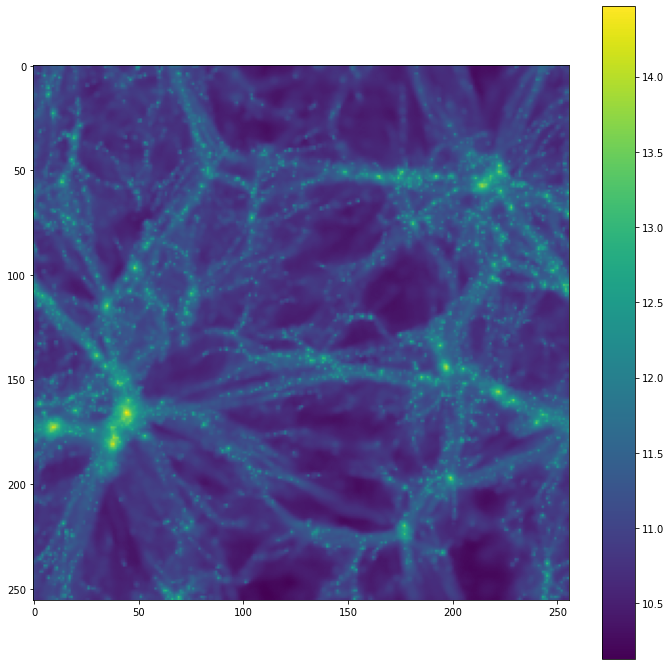

In [4]:
data_string=os.environ['CAMELS_PATH']+"/Maps_Mcdm_IllustrisTNG_LH_z=0.00.npy"
param_string=os.environ['CAMELS_PATH']+"/params_IllustrisTNG.txt"

## Import maps and parameters
maps = np.load(data_string)
params=np.loadtxt(param_string)

##Pick a field, any field
field_index=np.random.randint(len(maps))

plt.figure(figsize=(12,12))
plt.imshow(np.log10(maps[field_index]))
plt.colorbar()

/home/chris/.local/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


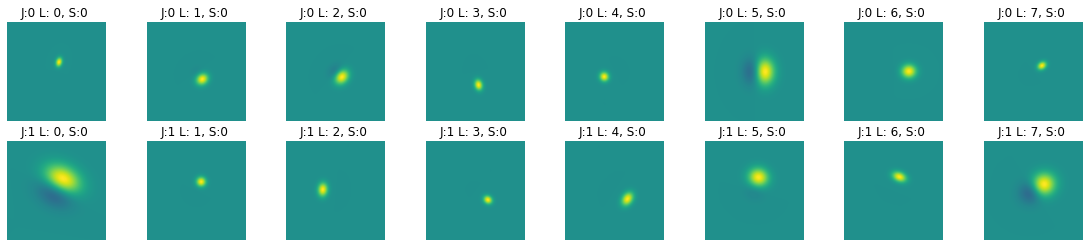

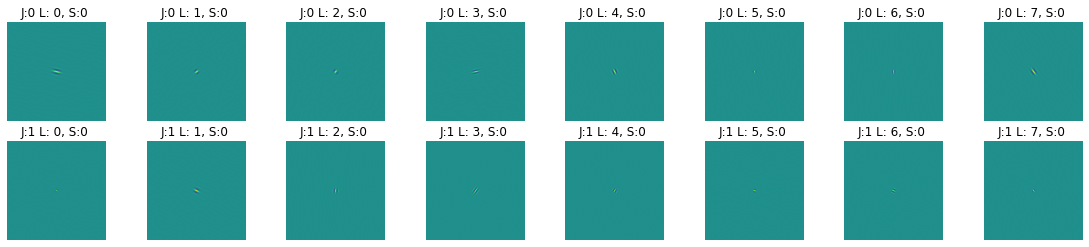

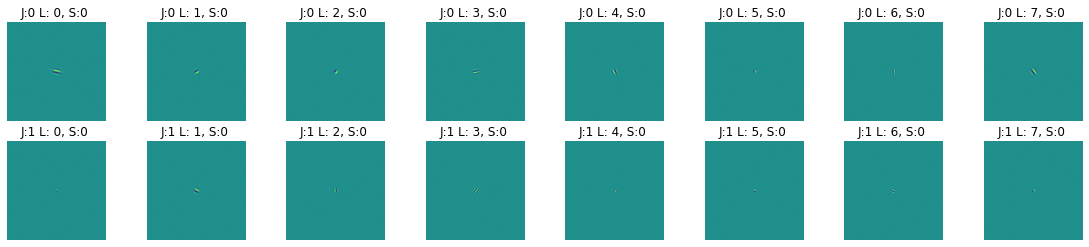

In [2]:
scatteringBase = baseModelFactory( #creat scattering base model
    architecture='scattering',
    J=2,
    N=256,
    M=256,
    second_order=True,
    initialization="Random",
    seed=123,
    learnable=False,
    lr_orientation=0.1,
    lr_scattering=0.1,
    filter_video=False,
    device="cpu",
    use_cuda=False
)

In [6]:
top = topModelFactory( #create cnn, mlp, linearlayer, or other
    base=scatteringBase,
    architecture="linear_layer",
    num_classes=12, 
    width=8, 
    use_cuda=False
)

In [7]:
hybridModel = sn_HybridModel(scatteringBase=scatteringBase, top=top, use_cuda=False) #creat hybrid model

In [ ]:
len(maps)

In [8]:
scattering=Scattering2D(J=1,shape=(256,256),max_order=1)
scattering2=Scattering2D(J=2,shape=(256,256),max_order=1)
scattering3=Scattering2D(J=3,shape=(256,256),max_order=1)

In [9]:
scattered=scattering(maps[field_index])
scattered2=scattering2(maps[field_index])
scattered3=scattering3(maps[field_index])

In [10]:
## 2nd order scattering
scattering_order2 = Scattering2D(J=2, shape=(256, 256),max_order=2)
scattered_order2=scattering_order2(maps[field_index])

In [11]:
scattered_model=scatteringBase.scattering(torch.from_numpy(maps[field_index]))

In [12]:
scattered_model[70].shape

torch.Size([64, 64])

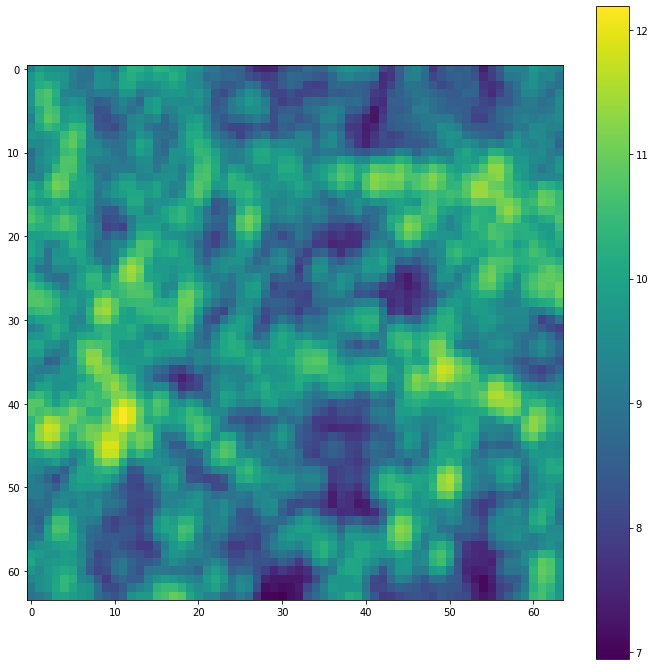

In [13]:
plt.figure(figsize=(12,12))
plt.imshow(np.log10(scattered_model[65]))
plt.colorbar()
plt.show()

In [14]:
scattered_model[33]-scattered_model[3]

tensor([[-2.8850e+09, -7.9102e+08, -3.2822e+09,  ..., -3.9308e+10,
         -2.6107e+10, -9.2496e+09],
        [-1.5188e+10, -6.9381e+10, -5.0585e+10,  ..., -1.5762e+10,
         -6.1657e+09, -1.4219e+09],
        [-3.1226e+09, -3.5718e+10, -5.7491e+10,  ..., -9.3915e+09,
         -9.0617e+08, -1.1357e+09],
        ...,
        [-5.5897e+09, -1.8915e+10, -3.6912e+10,  ..., -2.3305e+11,
         -9.1582e+10, -1.0297e+10],
        [-1.0692e+09, -3.7685e+09, -1.1695e+10,  ..., -8.7555e+10,
         -1.4071e+10, -1.3210e+10],
        [-9.6221e+08, -9.1825e+08, -4.1365e+09,  ..., -1.1916e+11,
         -3.2495e+10, -2.0825e+10]])

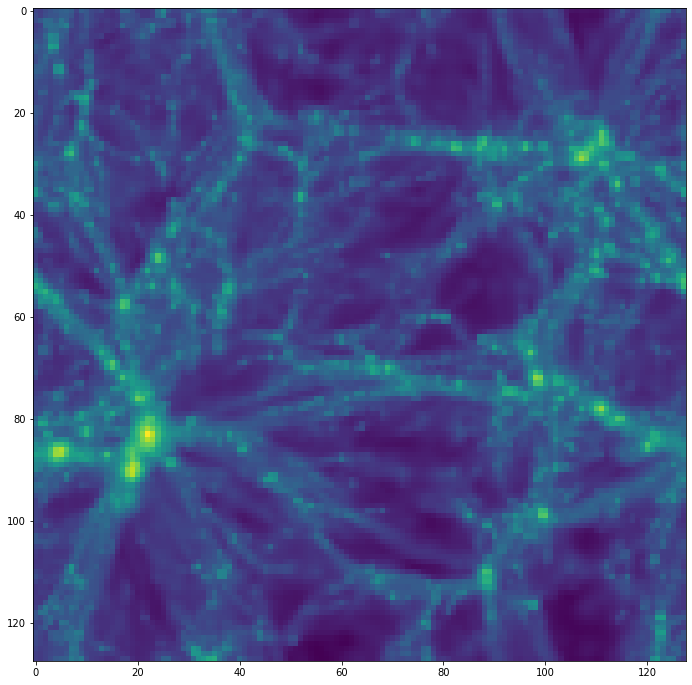

In [15]:
plt.figure(figsize=(12,12))
plt.imshow(np.log10(scattered[0]))
plt.show()

In [16]:
scatteringBase.n_coefficients

64

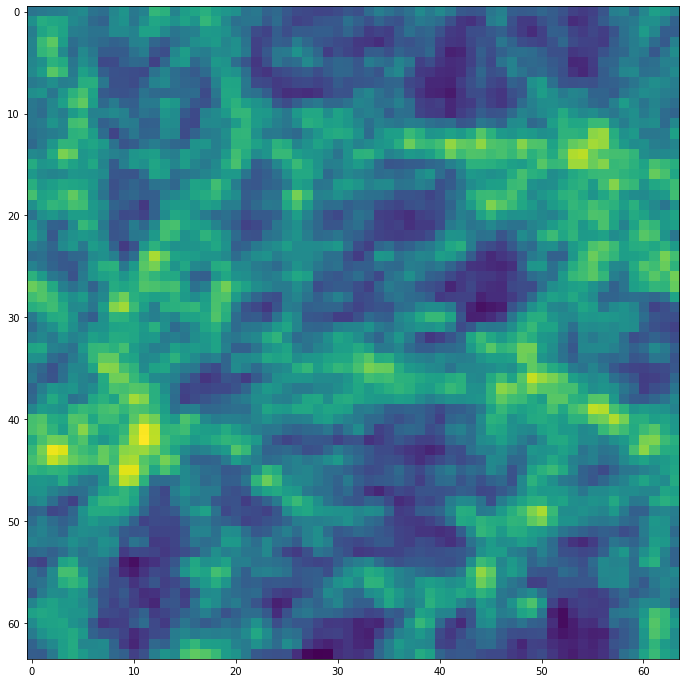

In [17]:
plt.figure(figsize=(12,12))
plt.imshow(np.log10(scattered2[3]))
plt.show()

In [18]:
len(scattered_order2)

81

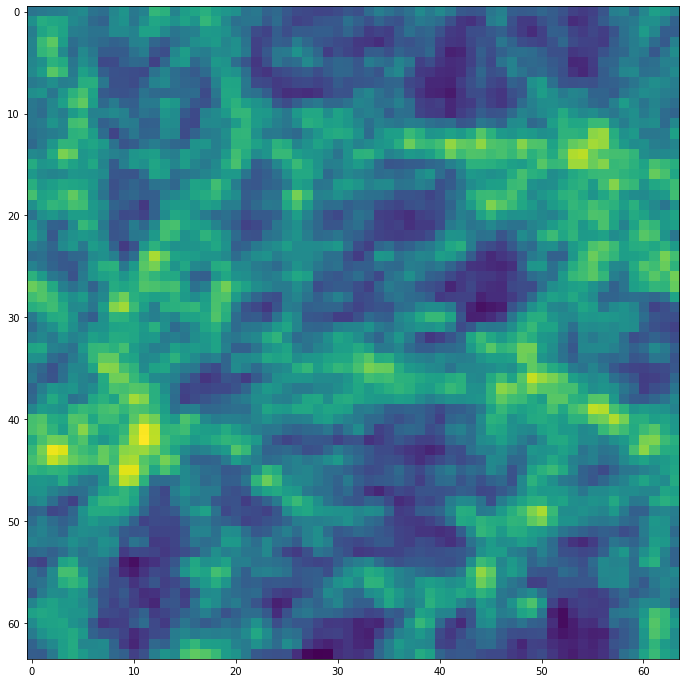

In [19]:
plt.figure(figsize=(12,12))
plt.imshow(np.log10(scattered_order2[3]))
plt.show()

In [20]:
np.shape(scattered_order2)

(81, 64, 64)

In [21]:
scattering_order2.psi

[{'j': 0,
  'theta': 0,
  0: array([[ 3.30301155e-08,  5.70249977e-03,  1.15883108e-02, ...,
          -1.59809291e-02, -1.08439773e-02, -5.51624596e-03],
         [ 2.34044832e-03,  8.12039059e-03,  1.40895126e-02, ...,
          -1.38400495e-02, -8.64180923e-03, -3.24772298e-03],
         [ 4.70431196e-03,  1.05570480e-02,  1.66046321e-02, ...,
          -1.16623044e-02, -6.40723109e-03, -9.51126218e-04],
         ...,
         [-6.79542031e-03, -1.35116547e-03,  4.25857631e-03, ...,
          -2.21041590e-02, -1.71746314e-02, -1.20709091e-02],
         [-4.57620714e-03,  9.58138204e-04,  6.66399347e-03, ...,
          -2.01206356e-02, -1.51181817e-02, -9.93590057e-03],
         [-2.30832351e-03,  3.31217982e-03,  9.11015831e-03, ...,
          -1.80770606e-02, -1.30053759e-02, -7.74838030e-03]], dtype=float32)},
 {'j': 0,
  'theta': 1,
  0: array([[-1.93904270e-08,  4.34753904e-03,  8.79489072e-03, ...,
          -1.23549774e-02, -8.35963339e-03, -4.23861295e-03],
         [ 4.34753

## Scattering and convolutions

Dig a little bit into the mechanics here. So after setting the input dimensions, we next create filters, using `filter_bank`

In [ ]:
len(scattering2.psi)

In [22]:
scattering2.psi[2][0].shape

(264, 264)

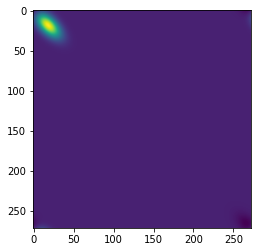

In [23]:
plt.imshow(scattering3.psi[17][0])

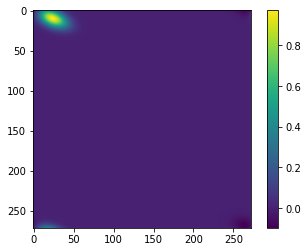

In [24]:
plt.imshow(scattering3.psi[16][0])
plt.colorbar()

In [25]:
scattering.M

256

In [26]:
scattering.psi[6][0]

array([[ 3.3397130e-09, -5.5996841e-03, -1.1004880e-02, ...,
         1.7938517e-02,  1.1772256e-02,  5.7916418e-03],
       [ 2.3766467e-03, -3.2970689e-03, -8.7705981e-03, ...,
         2.0573288e-02,  1.4314793e-02,  8.2481913e-03],
       [ 4.7773249e-03, -9.6559658e-04, -6.5028090e-03, ...,
         2.3216929e-02,  1.6871352e-02,  1.0723807e-02],
       ...,
       [-6.8965419e-03, -1.2247816e-02, -1.7422289e-02, ...,
         1.0185465e-02,  4.3237321e-03, -1.3715401e-03],
       [-4.6452470e-03, -1.0083456e-02, -1.5338873e-02, ...,
         1.2735061e-02,  6.7674890e-03,  9.7284466e-04],
       [-2.3435531e-03, -7.8646494e-03, -1.3197065e-02, ...,
         1.5322570e-02,  9.2533864e-03,  3.3635013e-03]], dtype=float32)

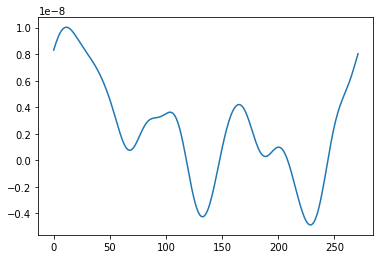

In [27]:
plt.plot(scattering3.psi[16][0][150])

In [ ]:
scat